<h1> SD-TSIA211 : Séparateurs à Vastes Marges

In [1]:
#imports
from breastcancerutils import load_breastcancer

import numpy as np
import matplotlib.pyplot as plt
import random as rd

from IPython.display import display, Markdown

<h2>1. Données </h2>

In [2]:
training_set, output = load_breastcancer('wdbcM1B0.data')

<h2>2. Méthode du sous-gradient </h2>

On veut résoudre le problème suivant

$$\min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}, \xi \in \mathbb{R}^{n}} \frac{1}{2} \sum_{j = 1}^{m} v_{j}^{2} + c \sum_{i = 1}^{n} \xi_{i}, \,\, s.t. \,\, \left\{ \begin{array}
\forall \forall i \in [\![ 1, n ]\!], & \xi_{i} \geq 0 \\
\forall i \in [\![ 1, n ]\!], & \xi_{i} \geq 1 - y_{i}(x_{i}^{T}v + a) \end{array} \right.$$

où $c = 1$.

<h3> Question 2.1. </h3>

Montrer que le problème $(1)$ est équivalent au problème $(2)$ suivant 

$$\min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}} \frac{1}{2} \sum_{j = 1}^{m} v_{j}^{2} + c \sum_{i = 1}^{n} max(0, 1 - y_{i}(x_{i}^{T}v + a))$$

c'est-à-dire que la valeur du minimum est la même et que l'on peut construire un optimum de $(1)$ à partir d'un optimum de $(2)$ et vice versa.

Afin de simplifier les notations, introduisons $$C(a) = \left\{ \xi \in \mathbb{R}^{n} : \left\{ \begin{array}
\forall \forall i \in [\![ 1, n ]\!], & \xi_{i} \geq 0 \\
\forall i \in [\![ 1, n ]\!], & \xi_{i} \geq 1 - y_{i}(x_{i}^{T}v + a) \end{array} \right. \right\}$$

et $$A = \min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}, \xi \in C(a)} \frac{1}{2} \sum_{j = 1}^{m} v_{j}^{2} + c \sum_{i = 1}^{n} \xi_{i}$$ 

On a $$A = \min_{v \in \mathbb{R}^{m}} \frac{1}{2} \sum_{j = 1}^{m} v_{j}^{2} + c \min_{a \in \mathbb{R}, \xi \in C(a)} \sum_{i = 1}^{n} \xi_{i}$$ car les variables sont séparables et que $c = 1 \geq 0$.

De plus, $$A = \min_{v \in \mathbb{R}^{m}} \frac{1}{2} \sum_{j = 1}^{m} v_{j}^{2} + c \min_{a \in \mathbb{R}} \sum_{i = 1}^{n} max(0, 1 - y_{i}(x_{i}^{T}v + a))$$ par définition de l'ensemble $C(a)$.

Ainsi, les variables étant toujours séparables, on a $$A = \min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}} \frac{1}{2} \sum_{j = 1}^{m} v_{j}^{2} + c \sum_{i = 1}^{n} max(0, 1 - y_{i}(x_{i}^{T}v + a))$$

Et les minima sont donc égaux, i.e. : $$\boxed{\min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}, \xi \in C(a)} \frac{1}{2} \sum_{j = 1}^{m} v_{j}^{2} + c \sum_{i = 1}^{n} \xi_{i} = \min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}} \frac{1}{2} \sum_{j = 1}^{m} v_{j}^{2} + c \sum_{i = 1}^{n} \max(0, 1 - y_{i}(x_{i}^{T}v + a))}$$

Soit $(v^{*}_{1}, a^{*}_{1}, \xi^{*}_{1})$ un minimiseur du problème $(1)$. On remarque que le couple $(v^{*}_{2}, a^{*}_{2}) = (v^{*}_{1}, a^{*}_{1})$ est un minimiseur du problème $(2)$.

Réciproquement, soit $(v^{*}_{2}, a^{*}_{2})$ un minimiseur du problème $(2)$. En posant, pour $i \in [\![ 1, n ]\!], \xi_{i} = \max(0, 1 - y_{i}(x_{i}^{T}v + a^{*}_{2}))$, on a bien $\xi \in C(a^{*}_{2})$ et on trouve que le triplet $(v^{*}_{1}, a^{*}_{1}, \xi^{*}_{1}) = (v^{*}_{2}, a^{*}_{2}, \xi)$ est un minimiseur du problème $(1)$. Ainsi,

<p style="text-align:center";> <span style="border:1px solid black;padding:1%">On peut construire un optimum de $(1)$ à partir d'un optimum de $(2)$ et vice versa.</span> </p>
 

<h3> Question 2.2. </h3>

Soit $$\begin{array}
hh : & \mathbb{R} & \longrightarrow & \mathbb{R} \\
     &      z     &     \mapsto     & max(0, 1 - z) \end{array}$$ 
 
Vérifier graphiquement que $$\forall z \in \mathbb{R}, \partial h(z) = \left\{ \begin{array}
\lbrace \lbrace -1 \rbrace & si & z < 1 \\
[-1, 0] & si & z = 1 \\
\lbrace 0 \rbrace & si & z > 1 \end{array} \right.$$

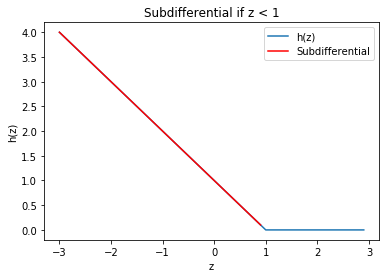

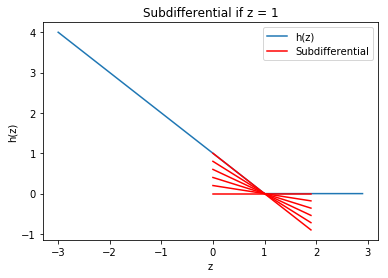

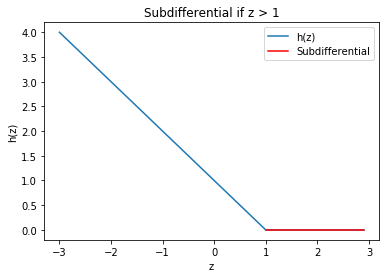

In [3]:
x_min = -3
x_max = 3
z_list = np.arange(x_min, x_max, 0.1)
h_z = np.maximum(0, 1 - z_list)


#if z < 1
plt.figure()
plt.title('Subdifferential if z < 1')
plt.xlabel('z')
plt.ylabel('h(z)')

plt.plot(z_list, h_z, label = 'h(z)')
plt.plot(np.arange(x_min, 1, 0.1), 1 - np.arange(x_min, 1, 0.1), c = 'r', label = 'Subdifferential')

plt.legend(loc = 'best')
plt.show()


#if z = 1
plt.figure()
plt.title('Subdifferential if z = 1')
plt.xlabel('z')
plt.ylabel('h(z)')

plt.plot(z_list, h_z, label = 'h(z)')
plt.plot(np.arange(0, 2, 0.1), 0/5 -np.arange(0, 2, 0.1)*0/5, c = 'r', label = 'Subdifferential')
for k in range(1,6) :
    plt.plot(np.arange(0, 2, 0.1), k/5 -np.arange(0, 2, 0.1)*k/5, c = 'r')

plt.legend(loc = 'best')
plt.show()


#if z > 1
plt.figure()
plt.title('Subdifferential if z > 1')
plt.xlabel('z')
plt.ylabel('h(z)')

plt.plot(z_list, h_z, label = 'h(z)')
plt.plot(np.arange(1, x_max, 0.1), 0*np.arange(1, x_max, 0.1), c = 'r', label = 'Subdifferential')

plt.legend(loc = 'best')
plt.show()

<h3> Question 2.3. </h3>

Posons $f(v ,a) = \frac{1}{2} \displaystyle\sum_{j = 1}^{m} v_{j}^{2} + c \displaystyle\sum_{i = 1}^{n} max(0, 1 - y_{i}(x_{i}^{T}v + a))$. Montrer qu'il existe une application linéaire $M$ et deux fonctions séparables $N$ et $H$ telles que $$f(v, a) = N(v, a) + cH(M(v, a))$$
En déduire que $$\partial f(v, a) = \partial N(v, a) + c M^{T} \partial H(M(v, a))$$

puis calculer $\partial N$ et $\partial H$.

Pour $v \in \mathbb{R}^{m}, a \in \mathbb{R}$, on pose $N(v, a) = \frac{1}{2} \sum_{j = 1}^{m} v_{j}^{2}$, qui est séparable. De plus, pour $u \in \mathbb{R}^{n}$, on pose $H(u) = \sum_{i = 1}^{m} max(0, 1 - u_{i})$, qui est également séparable.

Enfin, soit $M \in \mathbb{R}^{n \times (m+1)}$ la matrice définie par $$M = Diag(y_{1}, ..., y_{n}) \left( X | \mathbb{1}_{n} \right) \,\, avec \,\, X = \left( \begin{array}
xx_{1}^{T} \\
\,\vdots \\
x_{n}^{T} \end{array} \right) \in \mathbb{R}^{n \times m}$$

Vérifions que $N, H$ et $M$ respectent les conditions demandées.

$$\begin{array}
\forall\forall v \in \mathbb{R}^{m}, \forall a \in \mathbb{R}, M(v, a) & = Diag(y_{1}, ..., y_{n}) \left( X | \mathbb{1}_{n} \right) 
    \left( \begin{array}
    vv \\
    a \end{array} \right) \\
 & = Diag(y_{1}, ..., y_{n}) \left( \begin{array}
xx_{1}^{T}v + a \\
\,\,\,\,\,\,\,\,\vdots \\
x_{n}^{T}v + a \end{array} \right) \\
 & = \left( \begin{array}
yy_{1}(x_{1}^{T}v + a) \\
\,\,\,\,\,\,\,\,\,\,\vdots \\
y_{n}(x_{n}^{T}v + a) \end{array} \right)
\end{array}$$

Ainsi, on a bien $$\forall v \in \mathbb{R}^{m}, \forall a \in \mathbb{R}, cH(M(v, a)) = c \sum_{i = 1}^{n} max(0, 1 - y_{i}(x_{i}^{T}v + a))$$

D'où $$\boxed{\forall v \in \mathbb{R}^{m}, \forall a \in \mathbb{R}, f(v, a) = N(v, a) + c H(M(v, a))}$$

Clairement, $0 \in relint \left( dom(g) - M dom(f) \right)$ donc 

$$\boxed{\forall v \in \mathbb{R}^{m}, \forall a \in \mathbb{R}, \partial f(v, a) = \partial (N + c H \circ M))(v, a) = \partial N(v, a) + c M^{T} \partial H(M(v, a))}$$ 

car $\partial (c H \circ M)(v, a) = c M^{T} \partial H(M(v, a))$.


Calculons maintenant $\partial N$ et $\partial H$.

$N$ est séparable, donc :

$$\begin{array} \forall\forall v \in \mathbb{R}^{m}, \forall a \in \mathbb{R},
   \partial N(v, a) & = & \left\{ v_{1} \right\} \times \dots \times \left\{ v_{m} \right\} \times \left\{ {0} \right\} \\
                    & = & \left\{ (v_{1}, \dots , v_{m}, 0) \right\} \\
                    & = & \left\{ \left( \begin{array}
                                          vv \\
                                          0 \end{array} \right) \right\} \\
  \end{array}$$

i.e. $$\boxed{\forall v \in \mathbb{R}^{m}, \forall a \in \mathbb{R}, \partial N(v, a) = \left\{ \left( \begin{array}
                                                                                                  vv \\
                                                                                                  0 \end{array} \right) \right\}}$$

Par ailleurs, on a $$\boxed{\forall u \in \mathbb{R}^{n}, \partial H(u) = \prod_{i = 1}^{n} \partial h(u_{i})}$$

Et on connaît $\partial h(u_{i})$ grâce à la question $2.2$.

<h3> Question 2.4. </h3>

Coder une fonction qui retourne la valeur de la fonction et un de ses sous-gradient en tout point. Vous utiliserez la base de données <tt>diabeticRetinopathy</tt> fournie et $c = 1$. Il pourra être pratique de rajouter une colonne de uns à la matrice $X$.

In [4]:
training_set_wi = np.hstack((training_set, np.ones((training_set.shape[0],1))))

def H(u) :
    return sum(np.maximum(0, 1 - u))


def N(v, a) :
    return (v.T @ v)/2


def M_computation(v, a, training_set = training_set_wi, output = output) :
    return np.diag(output) @ training_set @ np.vstack((v,np.array([a])))


def partialH(z) :
    partialH_z = []
    
    for k in range(len(z)) :
        if z[k] < 1 :
            partialH_z.append(-1)
        elif z[k] == 1 :
            partialH_z.append(-rd.random())
        elif z[k] > 1 :
            partialH_z.append(0)
    return np.array(partialH_z)


def partialN(v, a) :
    return np.vstack((v, np.array([0])))


def f(v, a, training_set = training_set_wi, output = output, c = 1) :
    f_va = N(v, a) + c*H(M_computation(v, a, training_set, output))
    return f_va[0, 0]


def fSubGrad(v, a, training_set = training_set_wi, output = output, c = 1) :
    M = np.zeros((output.shape[0], training_set.shape[1]))
    M = M_computation(v, a, training_set, output)
    
    #we use formula from question 2.3.
    tmp = partialN(v, a)
    tmp2 = (c*(np.diag(output) @ training_set).T@partialH(M)).reshape(-1,1)
    
    return tmp + tmp2

<h3> Question 2.5. </h3>

Coder la méthode du sous-gradient et la lancer avec comme condition initiale $(v_{0}, a_{0}) = 0$.

In [5]:
def subGradMethod(training_set = training_set_wi, output = output, nb_iter = 1000, c = 1) :
    #initialization
    v_a = np.zeros((training_set.shape[1], 1))
    gamma = 1
    
    #gradient descent
    for k in range(1, nb_iter) :
        
        gamma = 1/(k+1)
        v = v_a[:-1]
        a = v_a[-1]
        v_a -= gamma*fSubGrad(v, a, training_set, output, c)
        
    return v_a

In [6]:
sub_grad_method = subGradMethod(nb_iter = 1000)
v1 = sub_grad_method[:-1]
a1 = sub_grad_method[-1]
f1 = f(v1, a1)

display(Markdown('With the output $(v_{1}^{*}, a_{1}^{*})$ of the sub-gradient method, the value of $f$ obtained is : ' + str(f1)))


With the output $(v_{1}^{*}, a_{1}^{*})$ of the sub-gradient method, the value of $f$ obtained is : 27.50248203692267

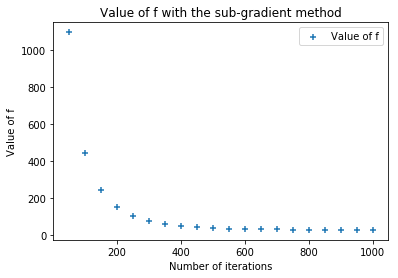

In [7]:
#This cell is quite long to run as we run the sub-gradient method several times with different numbers of iterations.
f_values = []

for k in range(1, 21) :
    v_a = subGradMethod(nb_iter = 50*k)
    f_values.append(f(v_a[:-1],v_a[-1]))
    
plt.figure()
plt.title('Value of f with the sub-gradient method')
plt.xlabel('Number of iterations')
plt.ylabel('Value of f')

plt.scatter(x = np.arange(50, 21*50,50), y = f_values, marker = '+', label = 'Value of f')

plt.legend(loc = 'best')
plt.show()

<h2> 3. Méthode du sous-gradient stochastique </h2>

On pose, pour $i \in [\![ 1, n ]\!]$,  $f_{i}(v, a) = \frac{1}{2} \displaystyle\sum_{j = 1}^{m} v_{j}^{2} + cn \cdot max(0, 1 - y_{i}(x_{i}^{T}v + a))$.

<h3> Question 3.1. </h3>

Soit $I$ une variable aléatoire qui suit une loi uniforme sur $\lbrace 1, ..., n \rbrace$. Montrer que 

$$f(v, a) = \mathbb{E}(f_{I}(v, a))$$

On a, par théorème de transfert : $$\mathbb{E} \left[ f_{I}(v, a) \right] = \sum_{i = 1}^{n} f_{i}(v, a) \mathbb{P}(I = i)$$

C'est-à-dire, par définition de $f_{i}(v, a)$ et car $I$ suit une loi uniforme : $$\mathbb{E} \left[ f_{I}(v, a) \right] = \sum_{i = 1}^{n} \left( \frac{1}{2} \sum_{j = 1}^{m} v_{j}^{2} + cn \cdot max(0, 1 - y_{i}(x_{i}^{T}v + a)) \right) \frac{1}{n}$$

i.e. $$\mathbb{E} \left[ f_{I}(v, a) \right] =  \left( \frac{n}{2} \sum_{j = 1}^{m} v_{j}^{2} + n \sum_{i = 1}^{n} c \cdot max(0, 1 - y_{i}(x_{i}^{T}v + a)) \right) \frac{1}{n}$$

Enfin, $$\mathbb{E} \left[ f_{I}(v, a) \right] =  \frac{1}{2} \sum_{j = 1}^{m} v_{j}^{2} + \sum_{i = 1}^{n} c \cdot max(0, 1 - y_{i}(x_{i}^{T}v + a)) $$

Puis : $$\boxed{f(v, a) = \mathbb{E}(f_{I}(v, a))}$$

<h3> Question 3.2. </h3>

Donner la  sous-différentielle de la fonction $f_{i}$.

Soit $i \in  [\![ 1, n ]\!]$. On a : $$\forall v \in \mathbb{R}^{m}, \forall a \in \mathbb{R}, f_{i}(v, a) = N(v, a) + cn \cdot h \left( y_{i}(x_{i}^{T}v + a) \right)$$

Donc, $$\boxed{\forall v \in \mathbb{R}^{m}, \forall a \in \mathbb{R}, \partial f_{i} (v, a) = \partial N (v, a) + cn \cdot y_{i} \left( x_{i}^{T} \,\, 1 \right)^{T} \partial h \left( y_{i}(x_{i}^{T}v + a) \right)}$$

<h3> Question 3.3. </h3>

Coder la méthode du sous-gradient stochastique et la lancer pour résoudre le problème $(2)$.

In [7]:
def partial_f_i(v, a, training_set = training_set_wi, output = output, c = 1) :
    n = training_set.shape[0]
    
    #a random sample is selected
    rd_i = rd.randint(0, n-1)
    rd_example = training_set[rd_i, :].reshape(-1, 1)
    rd_output = output[rd_i]
    #we use the formula from question 3.2., we can use partialH because the argument is a real number
    return partialN(v, a) + c*n * rd_output * rd_example * partialH(rd_output*(rd_example.T @ np.vstack((v, np.array([a])))))
    

def sgm(training_set = training_set_wi, output = output, nb_iter = 100, c = 1) :
    v_a = np.zeros((training_set.shape[1], 1))
    gamma = 1
    
    for k in range(1, nb_iter) :
        
        gamma = 1/(k+1)
        tmp = gamma*partial_f_i(v_a[:-1], v_a[-1], training_set, output, c)
        v_a -= tmp

    return v_a

In [10]:
sto_grad_method = sgm(nb_iter = 15000)
v2 = sto_grad_method[:-1]
a2 = sto_grad_method[-1]
f2 = f(v2, a2)

display(Markdown('With the output $(v_{2}^{*}, a_{2}^{*})$ of the stochastic sub-gradient method, the value of $f$ obtained is : ' + str(f2)))

With the output $(v_{2}^{*}, a_{2}^{*})$ of the stochastic sub-gradient method, the value of $f$ obtained is : 34.201279801173555

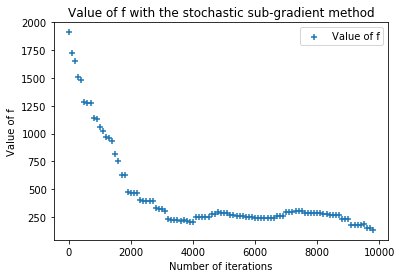

In [10]:
f_values_bis = []

for k in range(1, 150) :
    v_a = sgm(nb_iter = 100*k)
    f_values_bis.append(f(v_a[:-1],v_a[-1]))

f_filtered_values = [np.mean(f_values_bis[k:k+50]) for k in range(0, len(f_values_bis)-50)]
    
plt.figure()
plt.title('Value of f with the stochastic sub-gradient method')
plt.xlabel('Number of iterations')
plt.ylabel('Value of f')

plt.scatter(x = 100*np.arange(len(f_filtered_values)), y = f_filtered_values, marker = '+', label = 'Value of f')

plt.legend(loc = 'best')
plt.show()

<h2> 4. Méthode du lagrangien augmenté </h2>

<h3> Question 4.1. </h3>

Rappeler le Lagrangien associé au problème $(1)$.

Soit $(\nu,a,\xi) \in \mathbb{R}^{m} \times \mathbb{R} \times \mathbb{R}^{n}, \phi \in \mathbb{R}^{n}$. On a :

$$ \mathcal{L}((\nu,a,\xi),\phi) =  \frac{1}{2} \sum_{j = 1}^{n} v_{j}^{2} + c \sum_{i = 1}^{n} \xi_{i} + \ \langle \phi,m-\xi \rangle - \ \iota_{\mathbb{R}_{+}^{n}}(\phi)$$

avec $m = \left( \begin{array}
\ \max(0,y_{1}(x_{1}^{T}v + a)) \\
\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, \vdots \\
\max(0,y_{n}(x_{n}^{T}v + a)) \end{array} \right)$

Donc finalement :

$$ \boxed{\mathcal{L} \left( (\nu,a,\xi),\phi \right) =  \frac{1}{2} ||\nu||_{2}^{2} + c \sum_{i = 1}^{n} \xi_{i} + \ \sum_{i=1}^{n}\phi_{i}(\max(0,y_{i}(x_{i}^{T}v + a)-\xi_{i}) - \ \iota_{\mathbb{R}_{+}^{n}}(\phi)}$$

<h3> Question 4.2. </h3>

Montrer que les dérivées de $g$ par rapport à $x$ et par rapport à $\phi$ sont

$$ \nabla_{x} g(x, \phi) = \rho \max \left( 0, x + \frac{\phi}{\rho} \right) $$
$$ \nabla_{\phi} g(x, \phi) = \max \left( - \frac{\phi}{\rho}, x \right)$$

Distinguons les différents cas.

Soit $\phi \in \mathbb{R}$. $g(\cdot, \phi)$ est dérivable sur $\left] - \frac{\phi}{\rho}, + \infty \right[$ et, $$ \forall\, x > -\frac{\phi}{\rho}, \, \nabla_{x} g(x, \phi) = 0 + 2\frac{\rho}{2} \left( x+\frac{\phi}{\rho} \right) = \rho\max \left( 0,x+\frac{\phi}{\rho} \right) $$

De même, $g(\cdot, \phi)$ est dérivable sur $\left] - \infty, - \frac{\phi}{\rho} \right[$ et $$ \forall\, x < -\frac{\phi}{\rho}, \, \nabla_{x} g(x, \phi) = 0 + 0 = 0 =  \rho\max \left( 0,x+\frac{\phi}{\rho} \right) $$

D'après le théorème de la limite de la dérivée, $g(\cdot, \phi)$ est également dérivable en $- \frac{\phi}{\rho}$ et vaut la même chose.



Soit $x \in \mathbb{R}$. $g(x, \cdot)$ est dérivable sur $\left] - x \rho, + \infty \right[$ et $$\forall\,\phi > -x\rho, \, \nabla_{\phi} g(x, \phi) = - \frac{\phi}{\rho} + 2\frac{\rho}{2}\rho^{-1} \left( x+\frac{\phi}{\rho} \right) = x= \max \left( - \frac{\phi}{\rho}, x \right)$$

De même, $g(x, \cdot)$ est dérivable sur $\left] - \infty, - x \rho \right[$ $$ \forall\,\phi < -x\rho, \, \nabla_{\phi} g(x, \phi) = - \frac{\phi}{\rho} + 0 = -\frac{\phi}{\rho}= \max \left( - \frac{\phi}{\rho}, x \right)$$

D'après le théorème de la limite de la dérivée, $g(x, \cdot)$ est également dérivable en $- x \rho$ et vaut la même chose.

Finalement, on a bien : 

$$\boxed{\forall x \in \mathbb{R}, \forall \phi \in \mathbb{R}, \nabla_{x} g(x, \phi) = \rho \max \left( 0, x + \frac{\phi}{\rho} \right) }$$
$$ \boxed{\forall x \in \mathbb{R}, \forall \phi \in \mathbb{R}, \nabla_{\phi} g(x, \phi) = \max \left( - \frac{\phi}{\rho}, x \right)}$$

<h3> Question 4.3. </h3>

Montrer que la fonction $x \mapsto g \left( x, \phi \right)$ est convexe pour tout $\phi$ et que $\phi \mapsto g \left( x, \phi \right)$ est concave pour tout $x$.

Soit $\phi\in\mathbb{R}$. Calculons la dérivée seconde de $x \mapsto g \left( x, \phi \right)$.

De même qu'à la question précédente, en séparant les cas où le maximum est nul ou positif : 
$$\nabla_{x}^{2}g(x,\phi) = \rho \mathbb{1}_{\left\{ x \geq \phi \rho^{-1} \right\}} \geq 0$$

Ainsi : 
<p style="text-align:center";> <span style="border:1px solid black; padding:1%">La fonction $x \mapsto g \left(x,\phi \right)$ est convexe pour tout $\phi \in \mathbb{R}$.</span> </p>

Soit $x\in\mathbb{R}$. Calculons la dérivée seconde de $\phi \mapsto g \left( x, \phi \right)$.

$$\nabla_{\phi}^{2}g(x,\phi) = \frac{-1}{\rho} \mathbb{1}_{\left\{ x \leq - \frac{\phi}{\rho} \right\}} \leq 0$$

Ainsi : 
<p style="text-align:center";> <span style="border:1px solid black; padding:1%">La fonction $\phi \mapsto g \left(x,\phi \right)$ est concave pour tout $\phi \in \mathbb{R}$.</span></p>

La méthode du lagrangien augmenté s'écrit :

$$(v_{k+1},a_{k+1},\xi_{k+1}) \in \arg\min_{\nu,a,\xi}\mathcal{L}_{\rho}(v,a,\xi,\phi_{k},\psi_{k})$$
$$\phi_{k+1} = \phi_{k} + \rho\nabla_{\phi}\mathcal{L}_{\rho}(v_{k+1},a_{k+1},\xi_{k+1},\phi_{k},\psi_{k})$$
$$\psi_{k+1} = \psi_{k} + \rho\nabla_{\psi}\mathcal{L}_{\\rho}(v_{k+1},a_{k+1},\xi_{k+1},\phi_{k},\psi_{k})$$

<h3> Question 4.4. </h3>

Etant donnés des multiplicateurs $\phi_{0}$ et $\psi_{0}$, coder la méthode du gradient pour résoudre $\displaystyle\min_{v, a, \xi} L_{\rho}(v, a, \xi, \phi_{k}, \psi_{k})$. On choisira comme test d'arrêt $|| \nabla_{(a, v, \xi)} L_{\rho}(v, a, \xi, \phi_{k}, \psi_{k}) || \leq \epsilon$ où $\epsilon = 1$ et $\rho = 2$.

In [11]:
def grad_g(x, phi, var, rho = 2) :
    if var == 'x' :
        return rho*np.maximum(0, x + phi/rho)
    elif var == 'phi' :
        return np.maximum(-phi/rho, x)
    
#Input : variable = 'v', 'a' or 'xi' to choose the corresponding gradient
def gradient_L(v, a, xi, phi, psi, var, training_set = training_set, output_ = output, rho = 2, c = 1) :
    x = training_set.copy()
    y = output.copy()
    
    n = x.shape[0]
    
    if (var == 'v') :
        tmp = v.copy()
        
        for i in range(n) :
            tmp += -y[i] * x[i,:] * grad_g(- xi[i] + 1 - y[i]*(x[i,:].T@v + a), phi[i], 'x', rho)            
        gradient = tmp
        return gradient
    
    
    elif (var == 'a') :
        tmp = 0
        for i in range(n) :
            tmp += -y[i] * grad_g(- xi[i] + 1 - y[i]*(x[i].T@v + a), phi[i], 'x', rho)
        
        gradient = tmp
        return np.array([gradient])
    
    
    elif (var == 'xi') :
        gradient = []
        for i in range(n) :
            tmp = - grad_g(- xi[i], phi[i], 'x', rho)
            tmp += - grad_g(- xi[i] + 1 - y[i]*(x[i].T@v + a), phi[i], 'x', rho)
            gradient.append(c + tmp)
        return np.array(gradient)    
        
    
def gradient_descent(phi, psi, training_set = training_set, output = output, epsilon = 1, rho = 2, c = 1) :
    
    #initialization
    k = 1
    n = training_set.shape[0]
    m = training_set.shape[1]
    
    v = np.zeros(m)
    a = 0
    xi = np.zeros(n)
    
    gradv = gradient_L(v, a, xi, phi, psi, 'v', training_set, output, rho, c)
    grada = gradient_L(v, a, xi, phi, psi, 'a', training_set, output, rho, c).reshape(1)
    gradxi = gradient_L(v, a, xi, phi, psi, 'xi', training_set, output, rho, c).reshape(569)
    
    #to check the norm
    gradient = np.concatenate((gradv,grada,gradxi))
    
    while (np.linalg.norm(gradient) > epsilon) :
        gamma = 1/n #We need a small constant step in order to prevent diverging problems.
        
        v_tmp = v - gamma*gradv
        a_tmp = a - gamma*grada
        xi_tmp = xi - gamma*gradxi
        
        v = v_tmp.copy()
        a = a_tmp.copy()
        xi = xi_tmp.copy()
        k+=1
        
        gradv = gradient_L(v, a, xi, phi, psi, 'v', training_set, output, rho, c)
        grada = gradient_L(v, a, xi, phi, psi, 'a', training_set, output, rho, c).reshape(1)
        gradxi = gradient_L(v, a, xi, phi, psi, 'xi', training_set, output, rho, c).reshape(569)
        gradient = np.concatenate((gradv,grada,gradxi))
        
    return v.reshape(-1, 1), a, xi

In [12]:
v3, a3, xi3 = gradient_descent(np.zeros(training_set.shape[0]), np.zeros(training_set.shape[0]))

In [13]:
f3 = f(v3, a3)

display(Markdown('With the output $(v_{3}^{*}, a_{3}^{*})$, the value of $f$ obtained is : ' + str(f3)))

With the output $(v_{3}^{*}, a_{3}^{*})$, the value of $f$ obtained is : 27.498948996200824

<h3> Question 4.5. </h3>

Coder une fonction qui calcule $\nabla_{(\phi, \psi)} L_{\rho}(v_{k+1}, a_{k+1}, \xi_{k+1}, \phi_{k}, \psi_{k})$.

Pour $\rho > 0$, on définit $ g:\mathbb{R}^{2} \longrightarrow \mathbb{R}$ telle que $g(x,\phi) = - \frac{1}{2\rho}\phi^{2} + \frac{\rho}{2}(\max(0, x + \rho^{-1}\phi))^{2}$. On admet que le lagrangient augmenté associé au problème (1) s'écrit : 

$$\mathcal{L}_{\rho}(\nu,a,\xi,\phi,\psi) = \frac{1}{2}\|\nu\|_{2}^{2} + c\sum_{i=1}^{n}\xi_{i} + \sum_{i=1}^{n}g(-\xi_{i},\phi_{i}) + \sum_{i=1}^{n}g(-\xi_{i} + 1 - y_{i}(x_{i}^{T}\nu + a),\psi_{i})$$

In [14]:
#variable = 'phi' or 'psi'
def gradient_L_phipsi(a, v, xi, phi, psi, var, training_set = training_set, output = output, rho = 2, c = 1) :
    x = training_set.copy()
    y = output.copy()
    n = x.shape[0]
    
    if (var == "phi") :
        gradient = []
        for i in range(n) :
            tmp = grad_g(- xi[i], phi[i], 'phi', rho)
            gradient.append(tmp)
        
        return np.array(gradient)
    
    if (var == "psi") :
        gradient = []
        for i in range(n):
            tmp = grad_g(-xi[i] + 1 - y[i]*(x[i,:].T@v + a) ,psi[i],'phi',rho)
            gradient.append(tmp)
        return np.array(gradient)

<h3> Question 4.6. </h3>

Coder la méthode du lagrangien augmenté et la lancer pour la condition initiale $(\phi_{0}, \psi_{0}) = 0$ pour $2000$ itérations.

In [ ]:
zeros_n = np.zeros(training_set.shape[0])
zeros_m = np.zeros(training_set.shape[1])
def lagrangien_method(a = 0,v = zeros_m,xi = zeros_n,phi = zeros_n,psi = zeros_n, rho = 2, c = 1, nb_iter = 2000):
    
    for k in range(nb_iter):
        v, a, xi = gradient_descent(phi,psi,rho = rho)
        phi_tmp = phi + rho*gradient_L_phipsi(a,v,xi,phi,psi, var = "phi")
        psi_tmp = psi + rho*gradient_L_phipsi(a,v,xi,phi,psi, var = "psi")
        phi,psi = phi_tmp, psi_tmp
        
    return v,a,xi

v4,a4, xi4 = lagrangien_method()
f4 = f(v4,a4)

<h2> 5. Comparaison </h2>

<h3> Question 5.1. </h3>

Comparer les trois algorithmes.

Il nous est impossible d'exécuter la dernière méthode de lagrangien augmenté qui prend trop de temps, en raison de ses 2000 itérations et de la lenteur de la descente de gradient dont le pas a dû être choisi très petit pour éviter des problèmes de divergence.

En revanche, la méthode du sous-gradient nous donne un bon minimum (27). Elle est cependant plus lente que la méthode du gradient stochastique qui est, elle, très rapide, mais dont le caractère aléatoire donne parfois des résultats non pertinents (beaucoup trop élevés par rapport au minimum obtenu avec la première méthode) qui sont cependant rendus de plus en plus rares par une augmentation du nombre d'itérations. Il s'agit tout de même d'une bonne approximation puisque qu'il est fréquent d'obtenir un minimum environ égal à 30. A priori, la troisième méthode devrait être tout autant efficace (cf question 4.4. qui semble déjà donner un bon résultat) mais a l'inconvénient d'être très lente.
